In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/2c/8b/90eb44a40476fa0e71e05a0283947cfd74a5d36121a11d926ad6f3193cc4/opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 21.2 MB/s eta 0:00:00 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


(-0.5, 4283.5, 5711.5, -0.5)

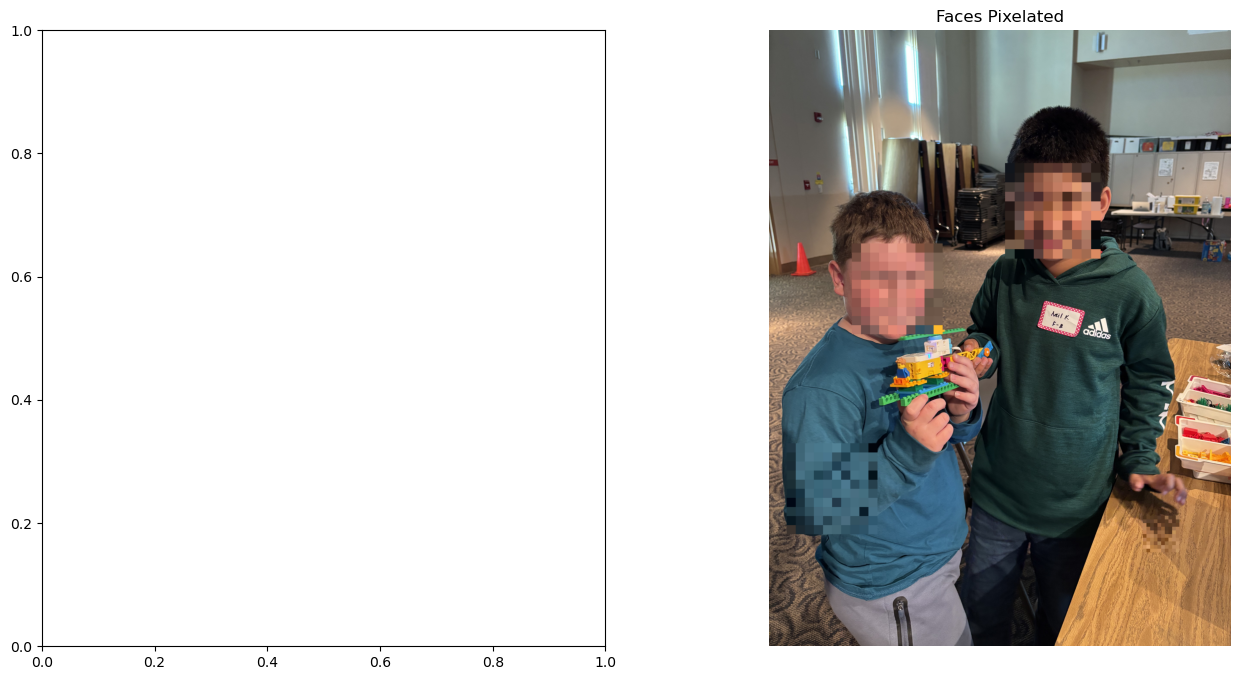

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pixelate(face, blocks=10):
    h,w = face.shape[:2]
    temp = cv2.resize(face, (blocks, blocks), interpolation=cv2.INTER_LINEAR)
    return cv2.resize(temp, (w,h), interpolation=cv2.INTER_NEAREST)

#enter any image path here
image_path = "IMG_0811.jpeg" 
image = cv2.imread(image_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

pixelated_image = image.copy()

for (x, y, w, h) in faces:
    face_pix = pixelated_image[y:y+h, x:x+w]
    pixelated_image[y:y+h, x:x+w] = pixelate(face_pix)

pixelated_rgb = cv2.cvtColor(pixelated_image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[1].imshow(pixelated_rgb)
ax[1].set_title('Faces Pixelated')
ax[1].axis('off')